<a href="https://colab.research.google.com/github/SunCheze/DE_db/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнее задание 1. Создание и нормализация базы данных

### 1. Структура базы данных

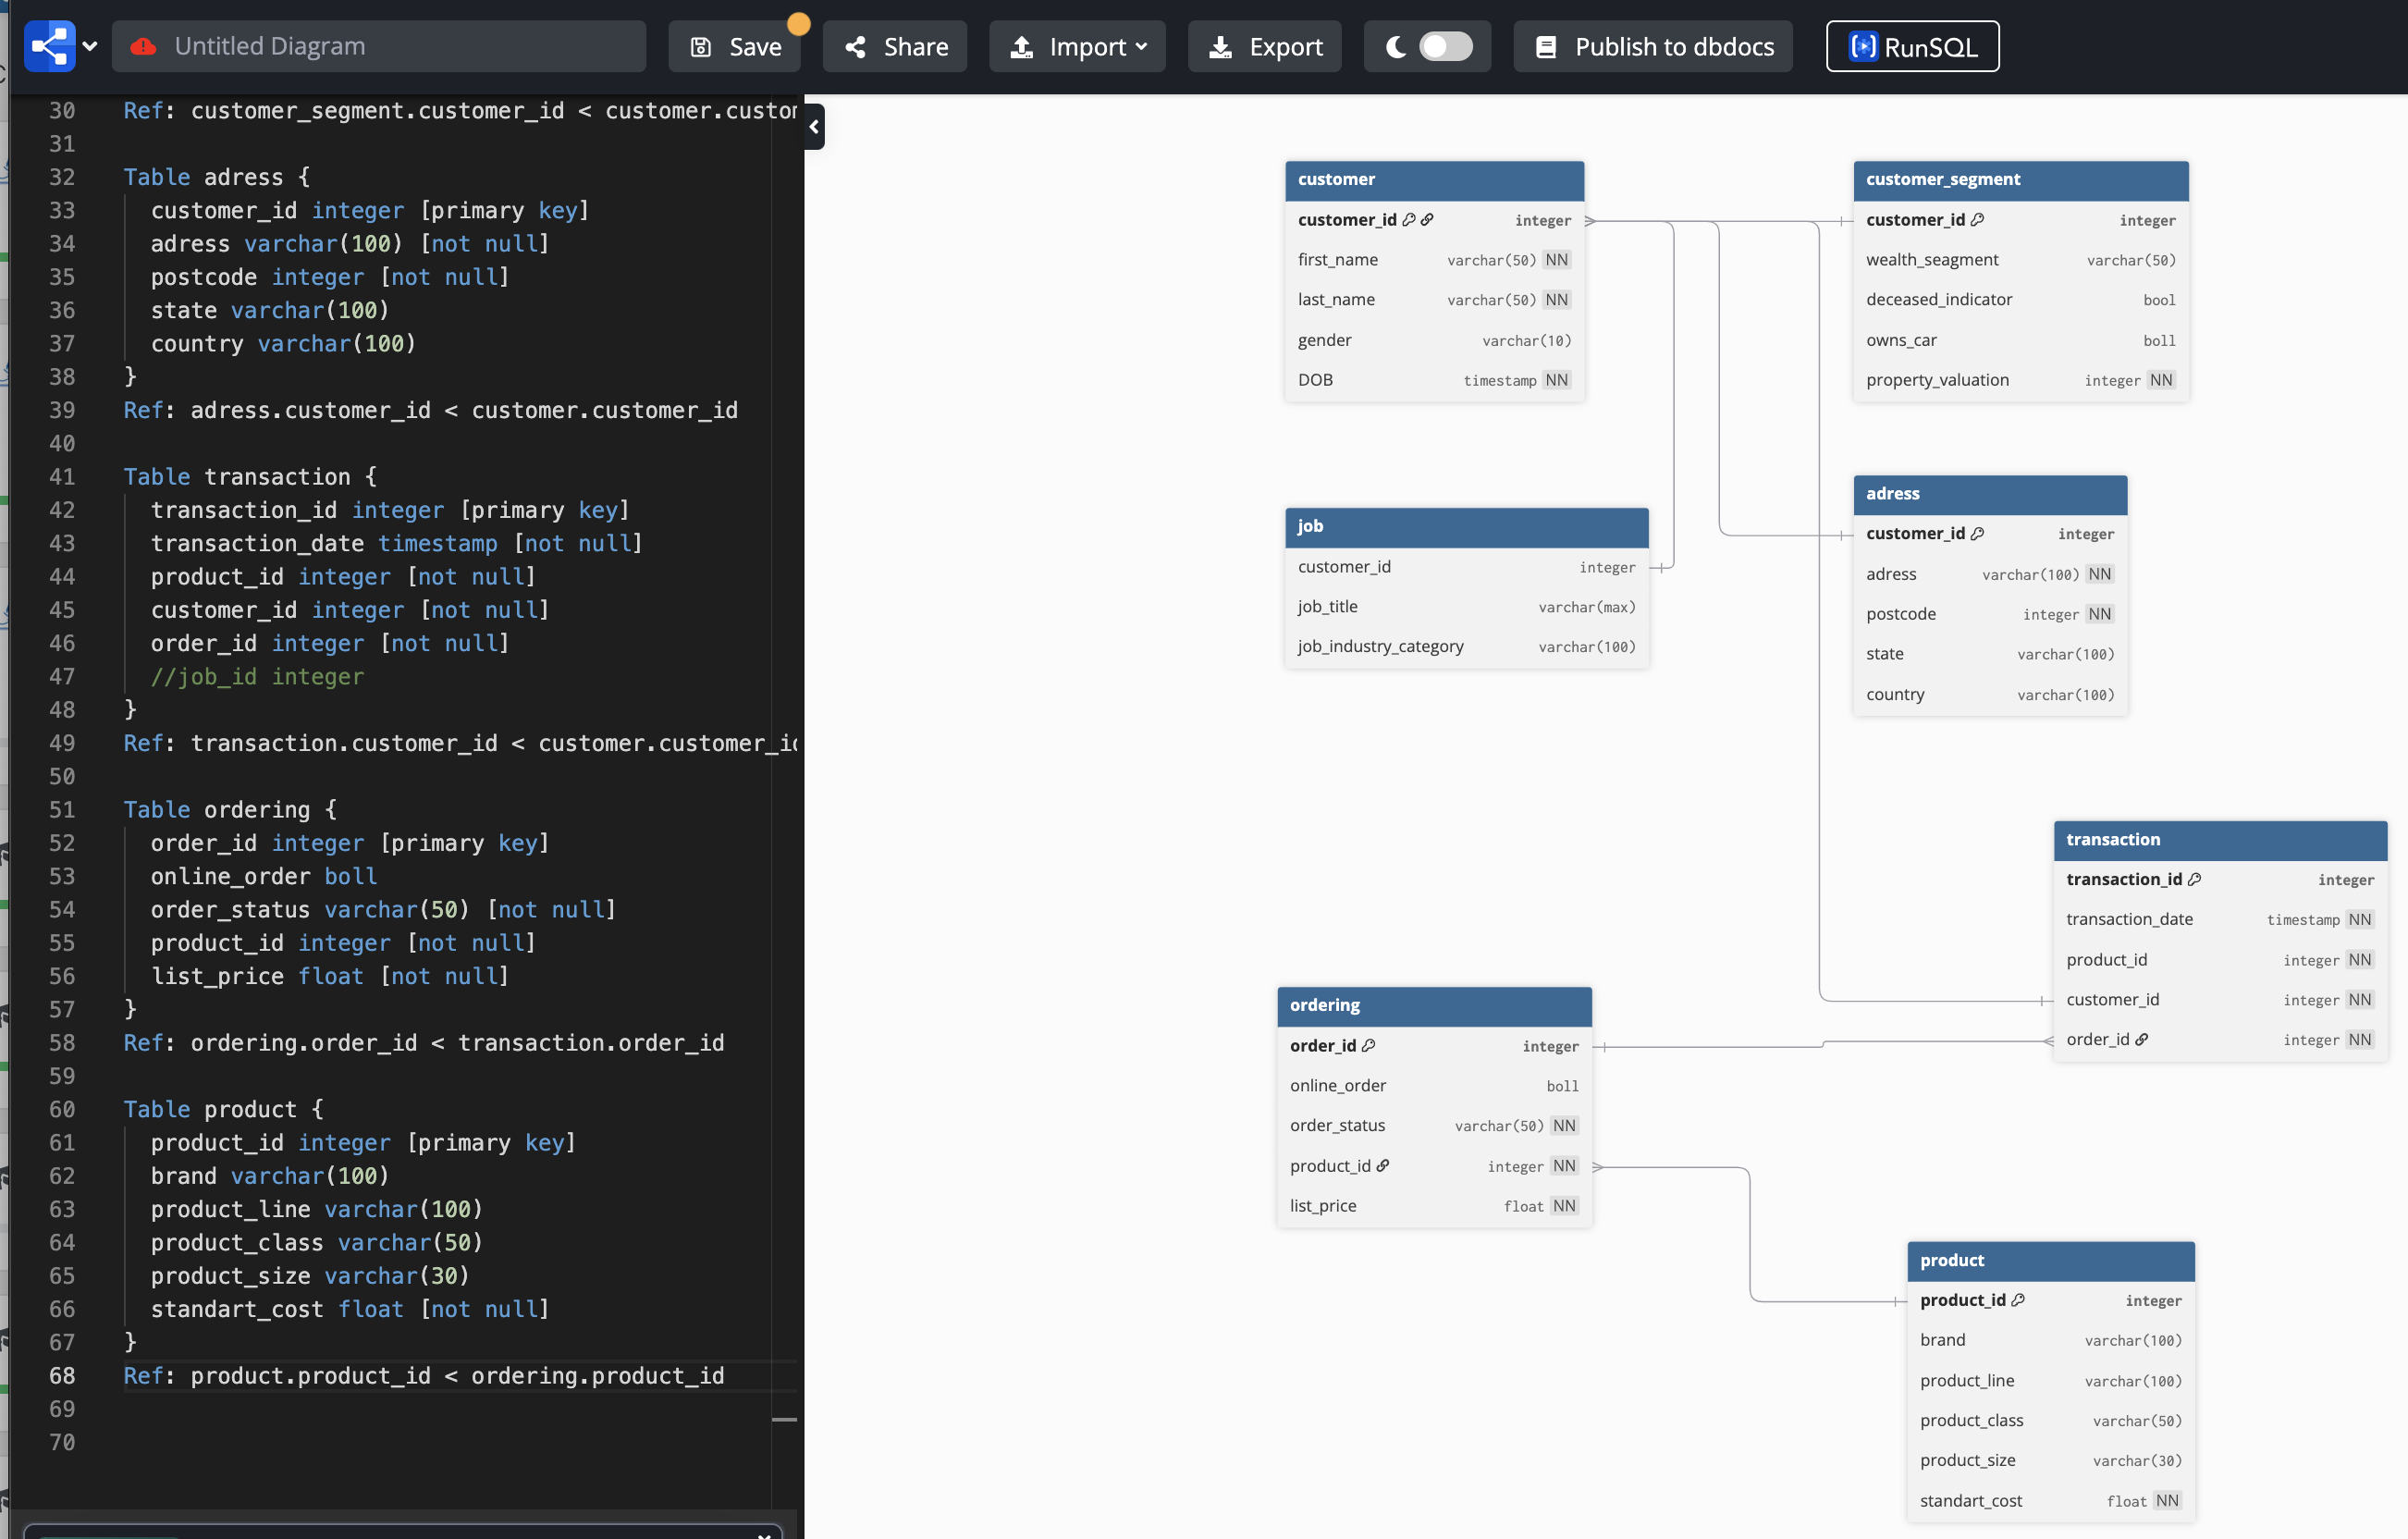

In [1]:
from IPython.display import Image
Image('/content/схема.png')



### 2. Нормализация базы данных (от 1НФ до 3НФ)

Таблица приводится к нормальной форме поэтапно. Исходная таблица соответствует 1НФ, так как все атрибуты таблицы простые, ячейки содержат только скалярные значения.

Для приведения к 2НФ проектирует схему так, чтобы каждый столбец, который не является ключом, зависел от первичного ключа. К примеру, выделим отдельно таблицу customer, в которую добавим поля customer_id, first_name, last_name, gender, dob, зависящие от первичного ключа. Уникальным полем будет customer_id, благодаря которому однозначно определяется личность, от которой зависят остальные поля.

Приведение к 3НФ. Таблица уже находится в 2НФ, проверим что любой столбец зависит от ключа customer_id. Действительно, других зависимостей у полей first_name, last_name, gender, dob нет, на них не ссылается ни одна таблица в схеме. Следовательно таблица приведена к 3НФ.

### Создание таблиц в DBeaver

In [ ]:
### скрипты создания таблиц

--done
CREATE TABLE customer (
    customer_id SERIAL PRIMARY key,
    first_name VARCHAR(50),-- NOT NULL,
    last_name VARCHAR(50),-- NOT NULL,
    gender VARCHAR(10),
    DOB TIMESTAMP-- NOT NULL
);
--done
CREATE TABLE job (
    customer_id SERIAL PRIMARY key,
    job_title TEXT,
    job_industry_category VARCHAR(100),
        FOREIGN KEY (customer_id)
        REFERENCES customer(customer_id)
        ON DELETE CASCADE
);
--done
CREATE TABLE customer_segment (
    customer_id SERIAL PRIMARY KEY,
    wealth_segment VARCHAR(50),
    deceased_indicator BOOLEAN,
    owns_car BOOLEAN,
    property_valuation INTEGER NOT NULL,
        FOREIGN KEY (customer_id)
        REFERENCES customer(customer_id)
        ON DELETE CASCADE
);
--done
CREATE TABLE address (
    customer_id SERIAL PRIMARY KEY,
    address VARCHAR(100),
    postcode INTEGER NOT NULL,
    state VARCHAR(100),
    country VARCHAR(100),
        FOREIGN KEY (customer_id)
        REFERENCES customer(customer_id)
        ON DELETE CASCADE
);

--done
CREATE TABLE product (
    product_id SERIAL PRIMARY KEY,
    brand VARCHAR(100),
    product_line VARCHAR(100),
    product_class VARCHAR(50),
    product_size VARCHAR(30),
    standard_cost NUMERIC(10, 2) NOT NULL
);

CREATE TABLE ordering (
    order_id SERIAL PRIMARY KEY,
    online_order BOOLEAN,
    order_status VARCHAR(50) NOT NULL,
    product_id INTEGER NOT NULL,
    list_price FLOAT NOT NULL,
        FOREIGN KEY (product_id)
        REFERENCES product(product_id)
        ON DELETE CASCADE
);


CREATE TABLE transaction (
    transaction_id SERIAL PRIMARY KEY,
    transaction_date TIMESTAMP NOT NULL,
    product_id INTEGER NOT NULL,
    customer_id INTEGER NOT NULL,
    order_id INTEGER NOT null,
        FOREIGN KEY (customer_id)
        REFERENCES customer(customer_id)
        ON DELETE CASCADE,
    FOREIGN KEY (product_id)
    REFERENCES product(product_id)
    ON DELETE CASCADE,
        FOREIGN KEY (order_id)
        REFERENCES ordering(order_id)
        ON DELETE CASCADE

);


Строками FOREIGN KEY (order_id)
         REFERENCES ordering(order_id)
         ON DELETE CASCADE
задаем связи между таблицами, а в случае удаления главной таблицы зависимые таблицы удаляются каскадом по зависимостям ON DELETE CASCADE.

Признак NOT NULL показывает какие поля должны быть точно заполнены, иначе возникнет ошибка.

### Загружаем данные в таблицу

1 вариант командой типа

INSERT INTO address (address, postcode, state, country)
values ('060 Morning Avenue', '2016', 'New South Wales', 'Australia');

2 вариант встоенным импортом DBeaver


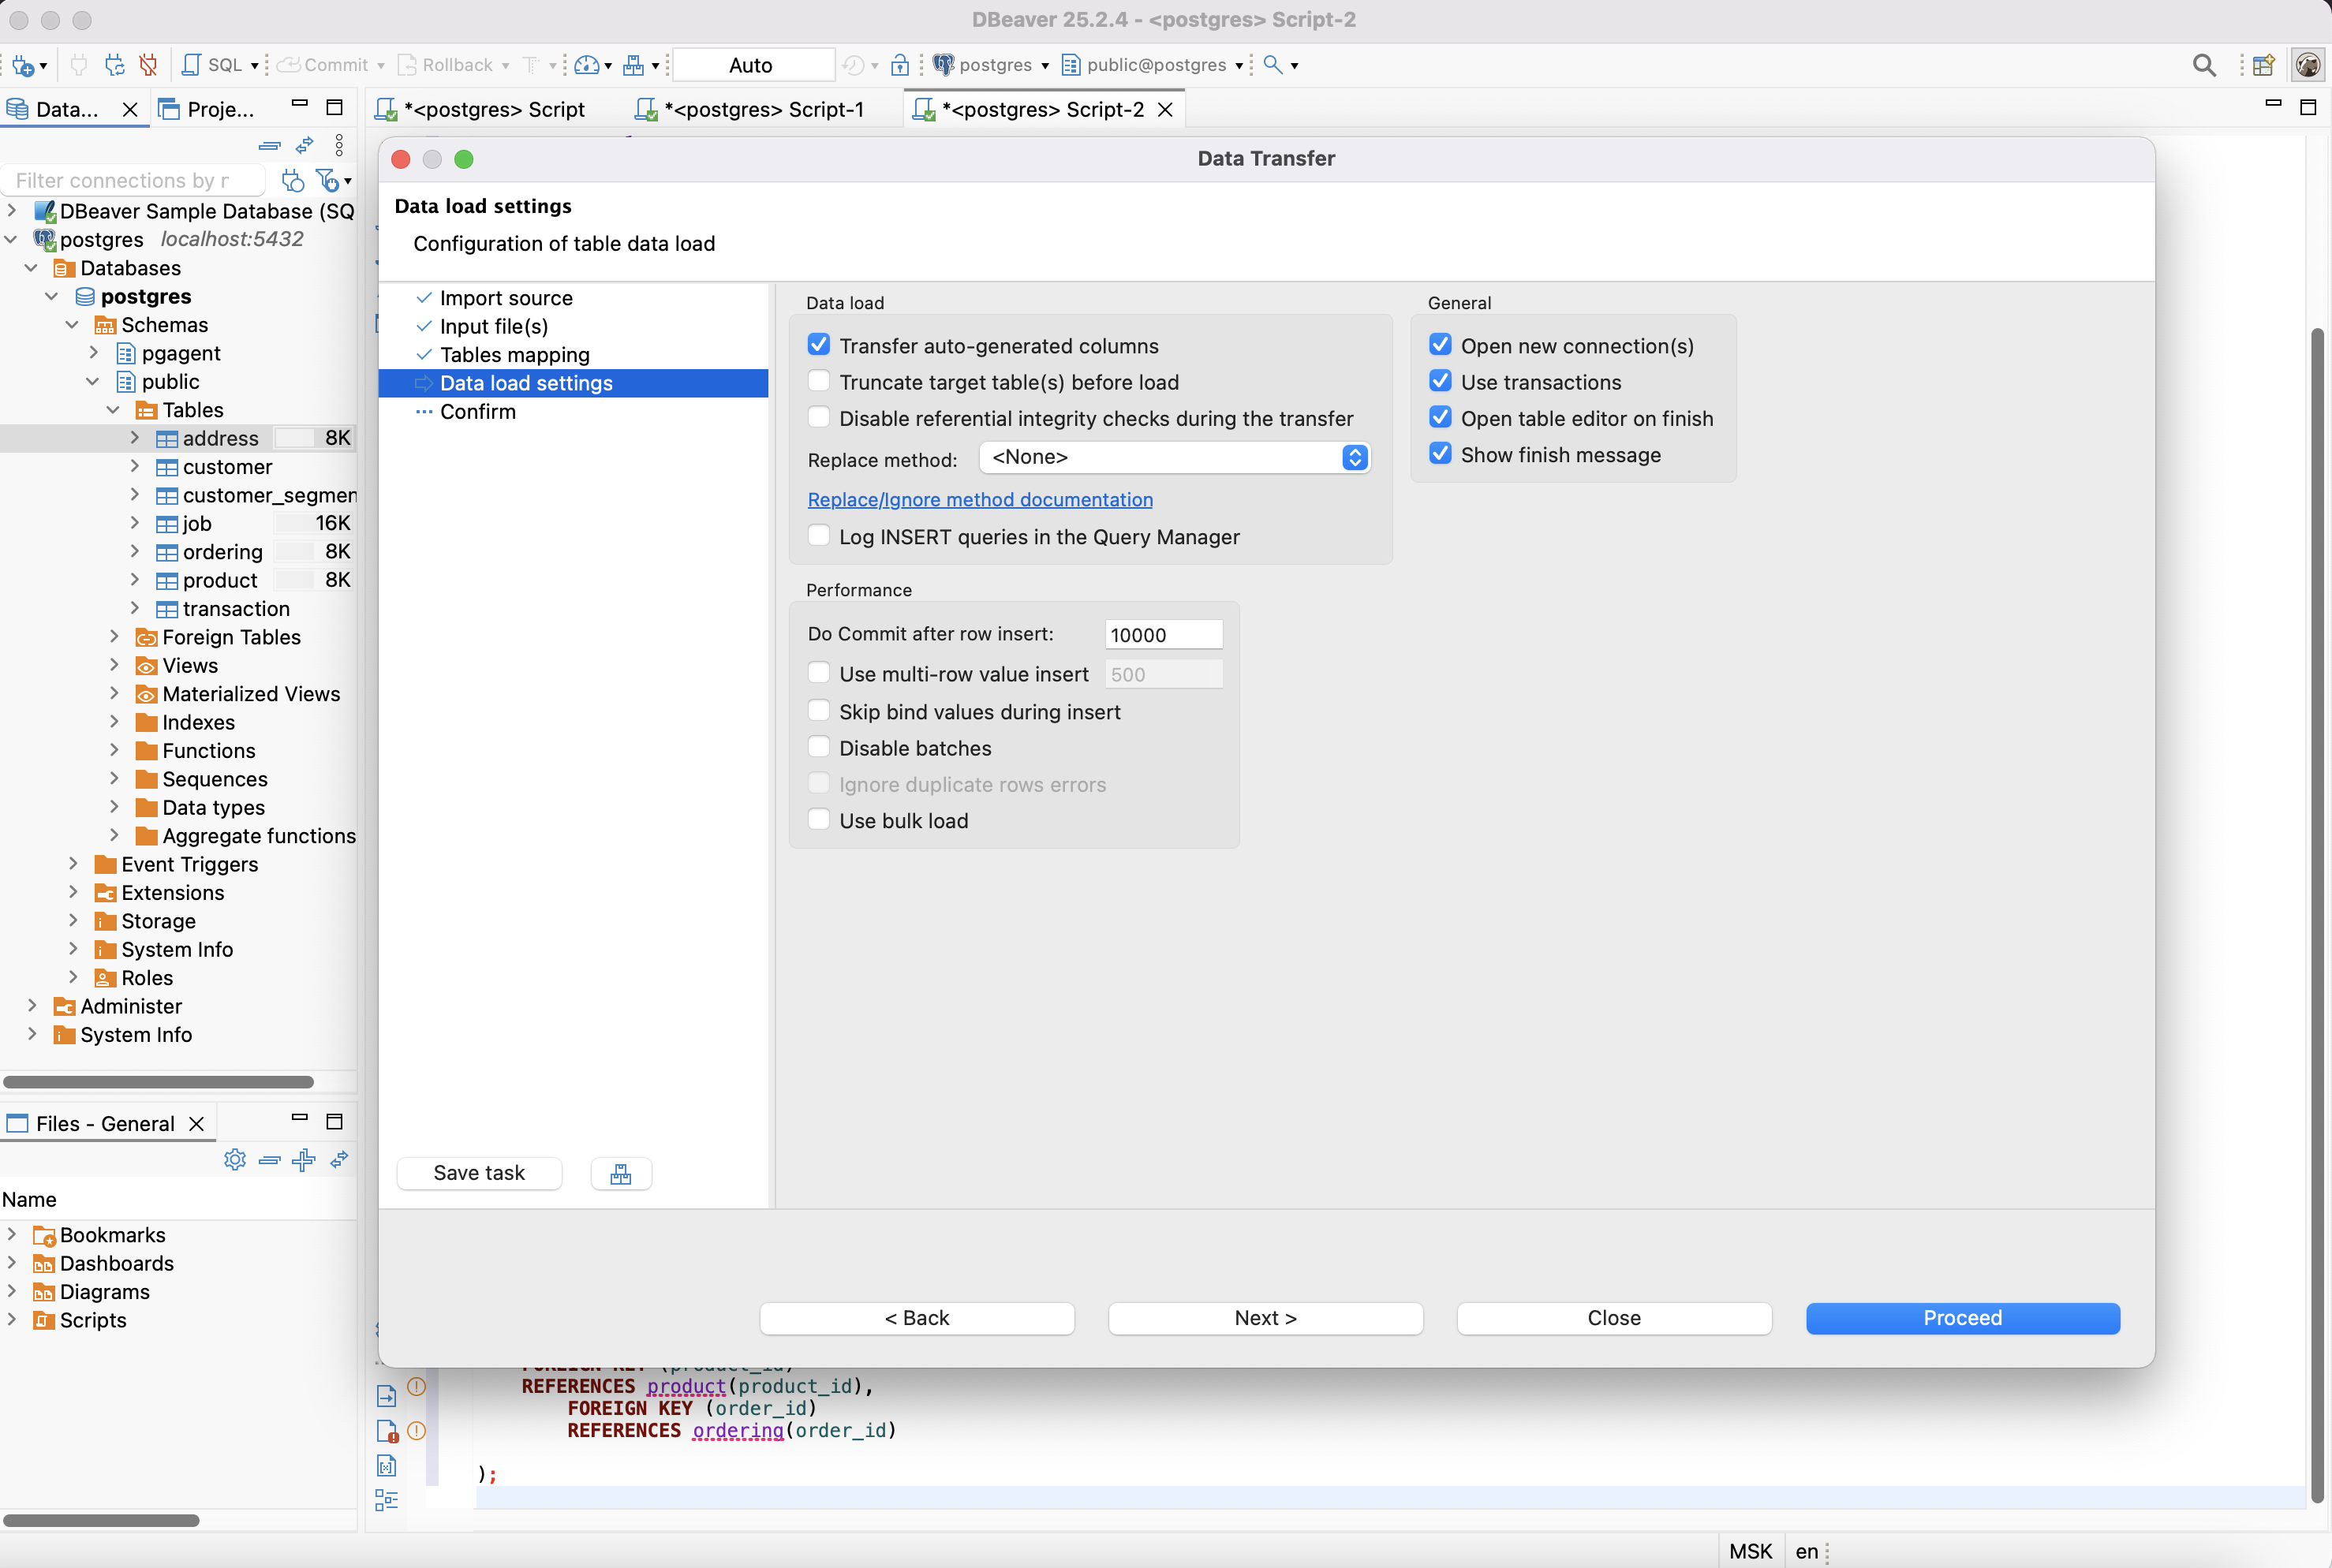

In [3]:

Image('скрин1.png')



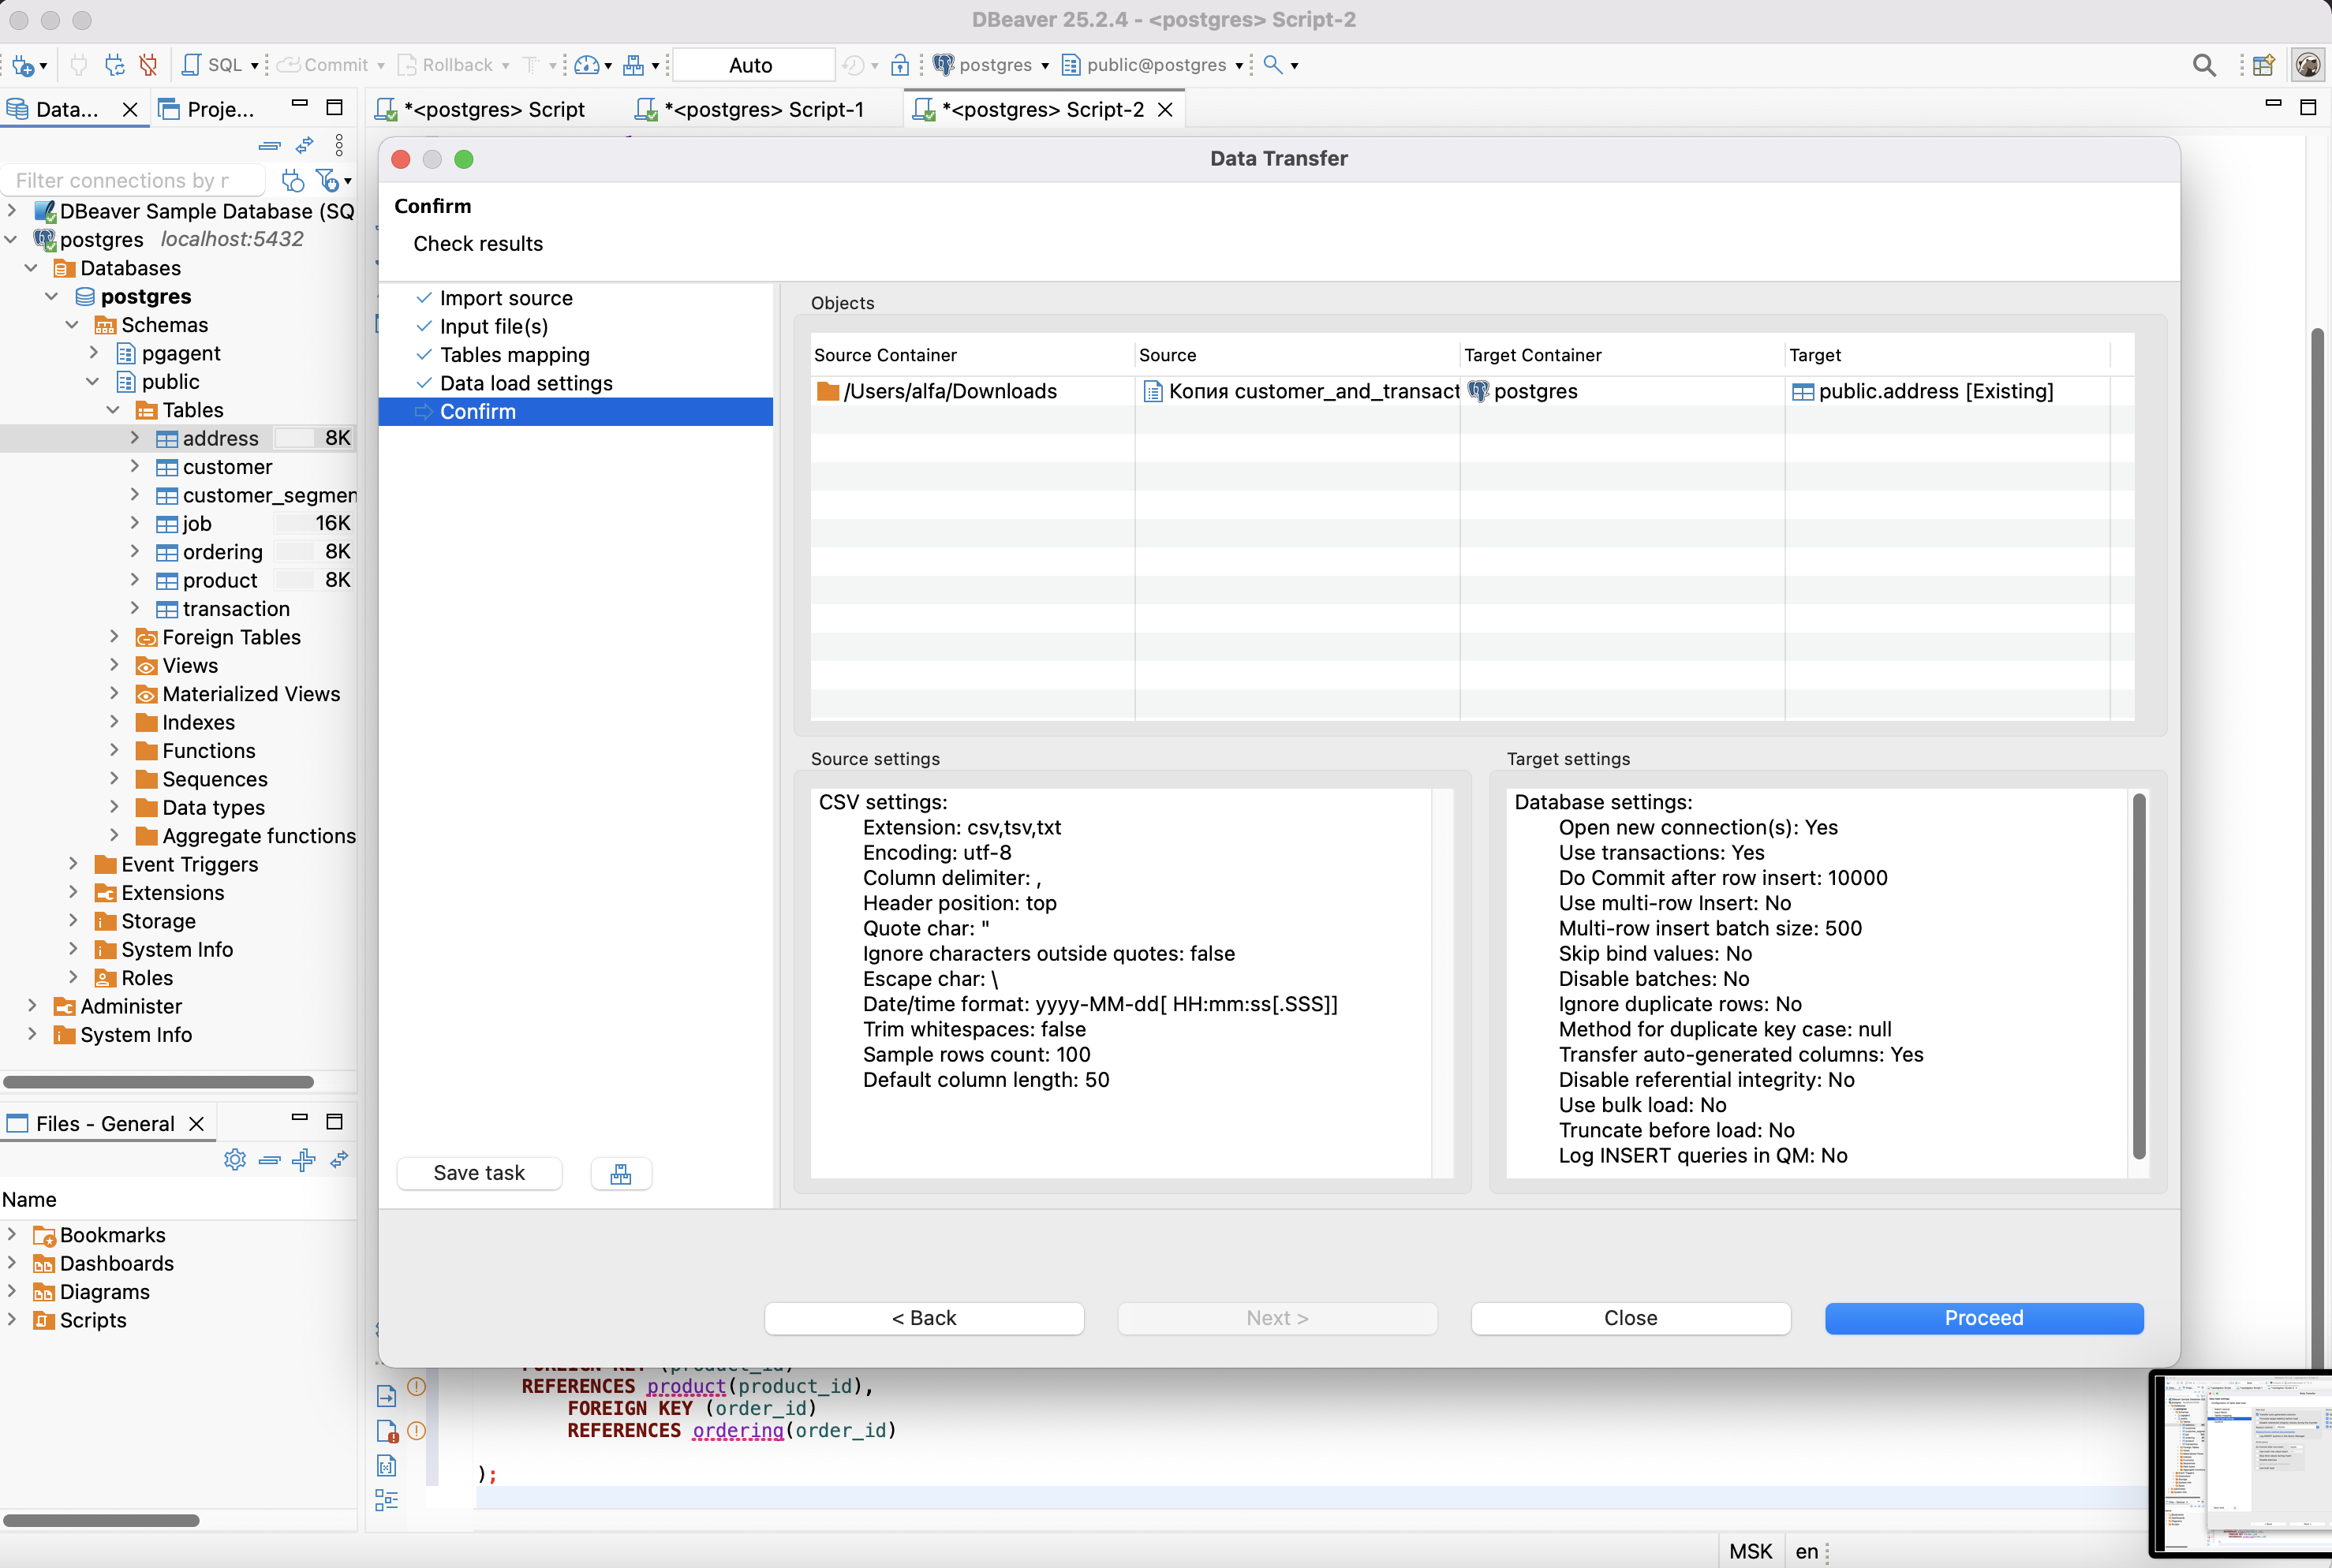

In [4]:
Image('скрин2.png')


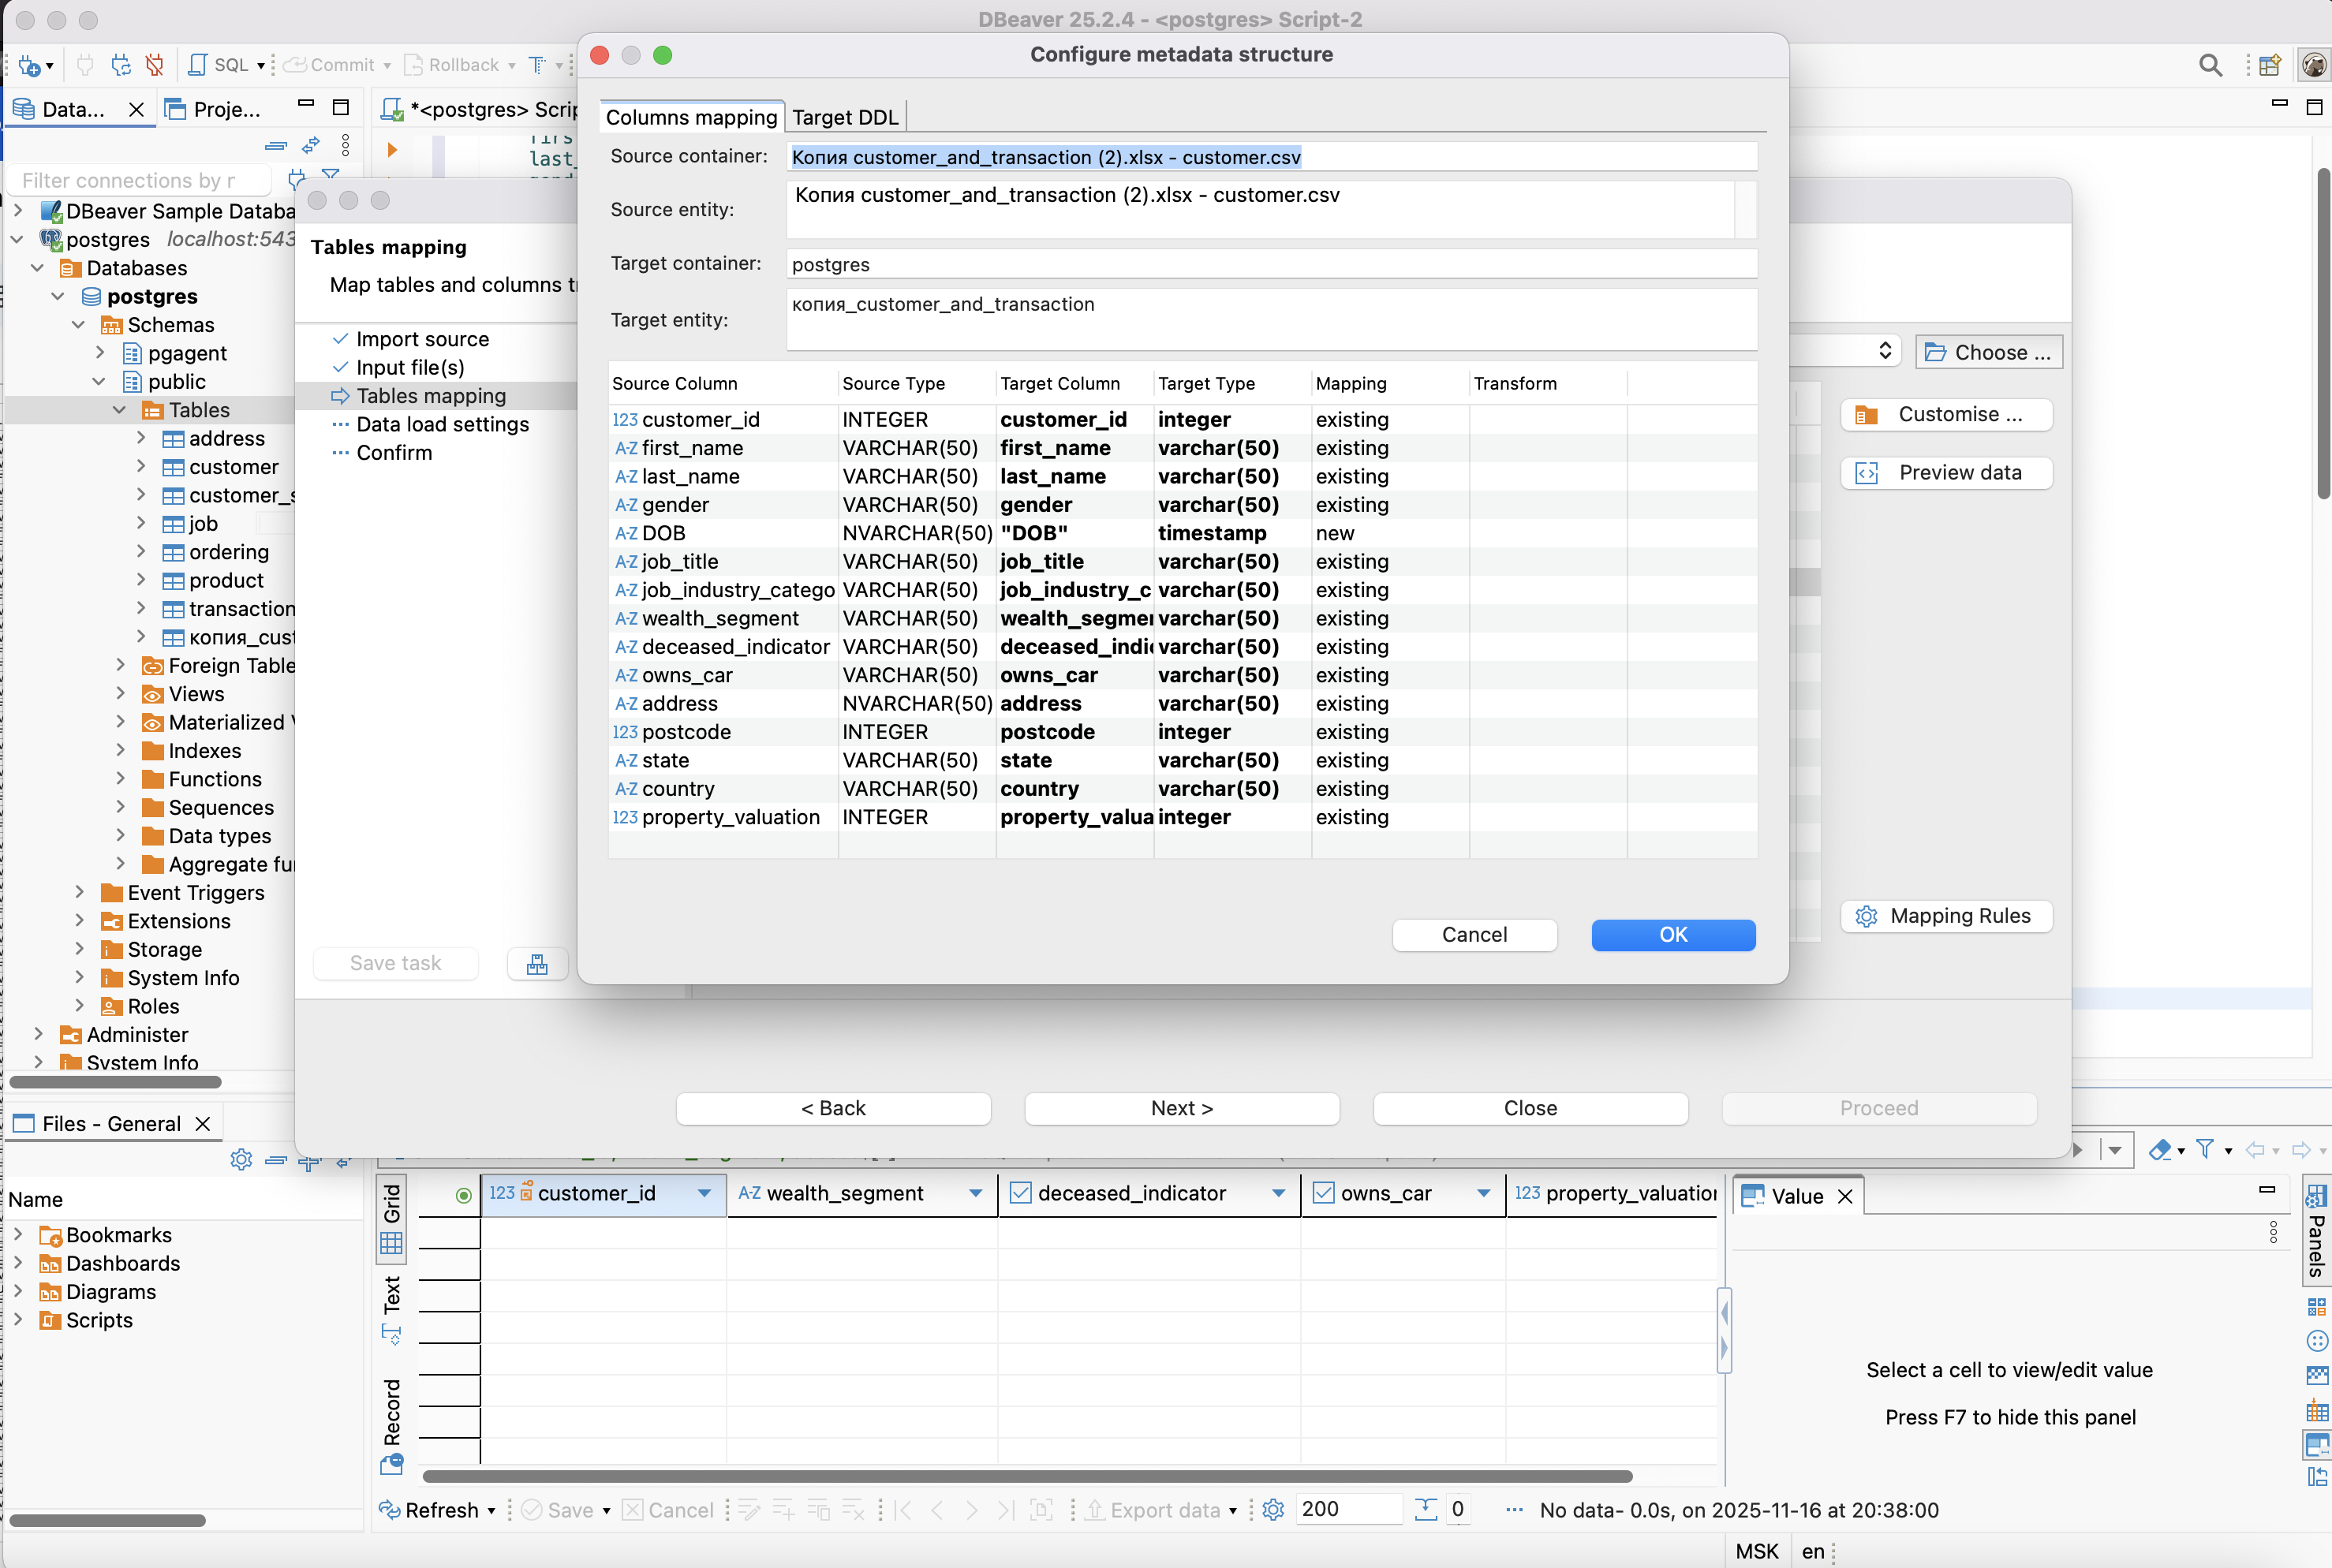

In [5]:
Image('скрин3.png')